<a href="https://colab.research.google.com/github/ishan-chowdhury/Machine-Learning-CSE11/blob/main/ClassificationComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install ucimlrepo

In [38]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)



{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 11)
(1300, 11)
(5197,)
(1300,)


In [41]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
lrmodel.fit(X_train , y_train)
ypred1 = lrmodel.predict(X_test)
ypred1

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([3, 2, 3, ..., 3, 2, 2])

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train , y_train)
ypred2 = dtmodel.predict(X_test)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train , y_train)
ypred3 = rfmodel.predict(X_test)
ypred3

array([3, 2, 4, ..., 4, 2, 4])

In [44]:
from sklearn.neighbors import KNeighborsClassifier as knnclassifier
knnmodel = knnclassifier()
knnmodel.fit(X_train , y_train)
ypred4 = knnmodel.predict(X_test)
ypred4

array([2, 2, 3, ..., 3, 3, 4])

In [45]:
from sklearn.naive_bayes import GaussianNB
gbmodel = GaussianNB()
gbmodel.fit(X_train , y_train)
ypred5 = gbmodel.predict(X_test)
ypred5

array([3, 2, 4, ..., 4, 2, 2])

In [46]:
from sklearn.metrics import accuracy_score

lrmodel_accuracy = accuracy_score(y_test, ypred1)
dtmodel_accuracy = accuracy_score(y_test, ypred2)
rfmodel_accuracy = accuracy_score(y_test, ypred3)
knnmodel_accuracy = accuracy_score(y_test, ypred4)
gbmodel_accuracy = accuracy_score(y_test, ypred5)

model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Gaussian Naive Bayes'],
    'Accuracy': [lrmodel_accuracy, dtmodel_accuracy, rfmodel_accuracy, knnmodel_accuracy, gbmodel_accuracy]
})

print(model_performance)

                  Model  Accuracy
0   Logistic Regression  0.476154
1         Decision Tree  0.604615
2         Random Forest  0.678462
3   K-Nearest Neighbors  0.453846
4  Gaussian Naive Bayes  0.469231


In [47]:
from sklearn.metrics import precision_score, recall_score, f1_score

lrmodel_precision = precision_score(y_test, ypred1, average='weighted')
lrmodel_recall = recall_score(y_test, ypred1, average='weighted')
lrmodel_f1 = f1_score(y_test, ypred1, average='weighted')

dtmodel_precision = precision_score(y_test, ypred2, average='weighted')
dtmodel_recall = recall_score(y_test, ypred2, average='weighted')
dtmodel_f1 = f1_score(y_test, ypred2, average='weighted')

rfmodel_precision = precision_score(y_test, ypred3, average='weighted')
rfmodel_recall = recall_score(y_test, ypred3, average='weighted')
rfmodel_f1 = f1_score(y_test, ypred3, average='weighted')

knnmodel_precision = precision_score(y_test, ypred4, average='weighted')
knnmodel_recall = recall_score(y_test, ypred4, average='weighted')
knnmodel_f1 = f1_score(y_test, ypred4, average='weighted')

gbmodel_precision = precision_score(y_test, ypred5, average='weighted')
gbmodel_recall = recall_score(y_test, ypred5, average='weighted')
gbmodel_f1 = f1_score(y_test, ypred5, average='weighted')

model_performance['Precision'] = [lrmodel_precision, dtmodel_precision, rfmodel_precision, knnmodel_precision, gbmodel_precision]
model_performance['Recall'] = [lrmodel_recall, dtmodel_recall, rfmodel_recall, knnmodel_recall, gbmodel_recall]
model_performance['F1-Score'] = [lrmodel_f1, dtmodel_f1, rfmodel_f1, knnmodel_f1, gbmodel_f1]

print(model_performance)

                  Model  Accuracy  Precision    Recall  F1-Score
0   Logistic Regression  0.476154   0.410634  0.476154  0.412730
1         Decision Tree  0.604615   0.608929  0.604615  0.605265
2         Random Forest  0.678462   0.683571  0.678462  0.667015
3   K-Nearest Neighbors  0.453846   0.440928  0.453846  0.441409
4  Gaussian Naive Bayes  0.469231   0.492309  0.469231  0.466427


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

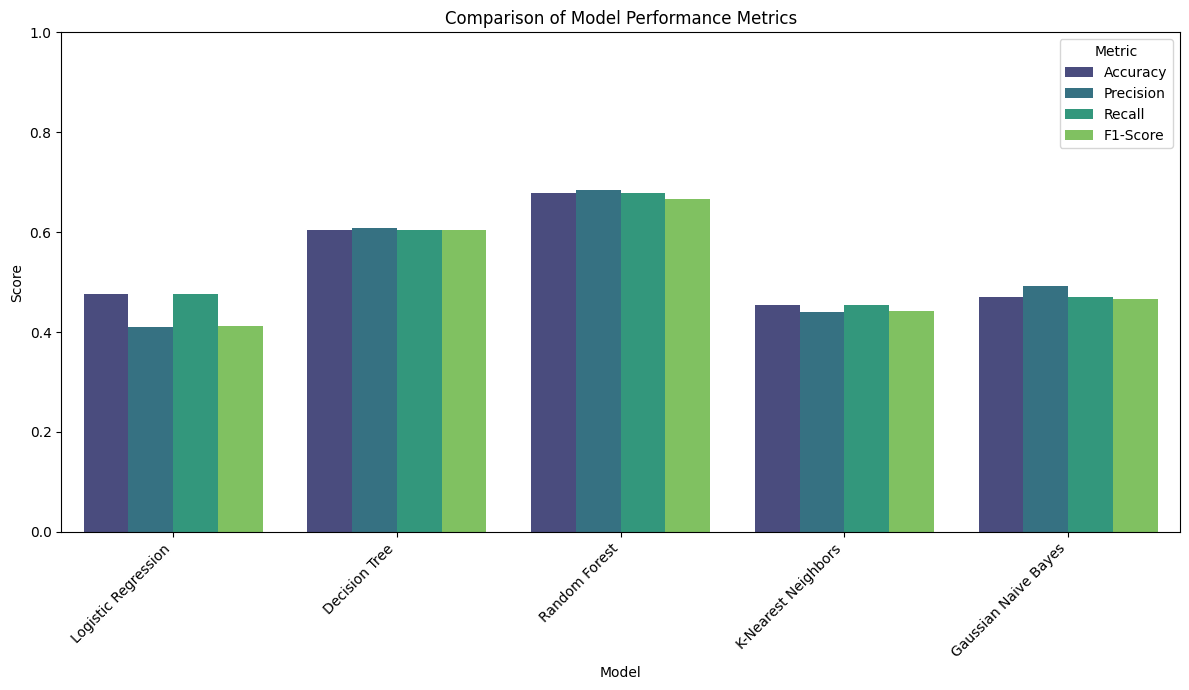

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame to have metrics as a single column for plotting
model_performance_melted = model_performance.melt(id_vars=['Model'], var_name='Metric', value_name='Score')

plt.figure(figsize=(12, 7))
sns.barplot(x='Model', y='Score', hue='Metric', data=model_performance_melted, palette='viridis')
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1) # Metrics are between 0 and 1
plt.legend(title='Metric')
plt.tight_layout()
plt.show()